# Cars&Bids dataset Data Cleaning and EDA

In [200]:
# loading requisite packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [201]:
# pointing to the copy of the data
# make a function to
# file_path = 'your filepath to the data here'
file_path = "~/OneDrive/Documents/FU_GSB_MSBA/Fall_2022/Web_Analytics/Data/ProjectData/cars_df1.csv"

cars_df = pd.read_csv(file_path)

## Initial Data Profiling

In [202]:
# checking the column names
cars_df.columns

Index(['Make', 'Model', 'Mileage', 'VIN', 'Title Status', 'Location', 'Seller',
       'Engine', 'Drivetrain', 'Transmission', 'Body Style', 'Exterior Color',
       'Interior Color', 'Seller Type', 'URL', 'id', 'year', 'price',
       'auction_outcome', 'bid_count', 'reserve_status', 'num_views',
       'end_datetime', 'num_photos'],
      dtype='object')

In [203]:
# snake casing the columns and making them lowercase
cars_df.columns = cars_df.columns.str.lower().str.replace(' ', '_')
cars_df.columns

Index(['make', 'model', 'mileage', 'vin', 'title_status', 'location', 'seller',
       'engine', 'drivetrain', 'transmission', 'body_style', 'exterior_color',
       'interior_color', 'seller_type', 'url', 'id', 'year', 'price',
       'auction_outcome', 'bid_count', 'reserve_status', 'num_views',
       'end_datetime', 'num_photos'],
      dtype='object')

In [204]:
# checking the shape of the dataset
print(f"{cars_df.shape[0]} records of {cars_df.shape[1]} features")

9963 records of 24 features


In [205]:
# checking the top of the dataset
cars_df.head()
# "Save" got appended to each model name from scraping, that needs cleaning

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,url,id,year,price,auction_outcome,bid_count,reserve_status,num_views,end_datetime,num_photos
0,Audi,S6Save,"288,200",WAULA84A5SN121685,Clean (NC),"Raleigh, NC 27609",rustyone2022,2.2L Turbocharged I5,4WD/AWD,Manual (5-Speed),...,https://carsandbids.com/auctions/rxk84RwQ/1995...,1995-audi-s6-avant,1995,7700,Sold toTommyCarDoc,33,No reserve,9032.0,"Nov 18, 2022 3:49 PM EST",72
1,Ford,MaverickSave,200,3FTTW8E3XNRA95168,Clean (CA),"La Mesa, CA 91942",carDaveSD,2.5L Hybrid I4,Front-wheel drive,Automatic (CVT),...,https://carsandbids.com/auctions/rGN6Z7Q2/2022...,2022-ford-maverick-xlt,2022,29875,Sold toBluejeansjj,13,Reserve,7275.0,"Nov 18, 2022 1:51 PM EST",74
2,Nissan,GT-RSave,"39,500",JN1AR5EF5GM290729,Clean (MD),"Silver Spring, MD 20906",Fainmous,3.8L Turbocharged V6,4WD/AWD,Automatic (6-Speed),...,https://carsandbids.com/auctions/9WbPwOYQ/2016...,2016-nissan-gt-r-premium,2016,68000,Sold toMtnRunner784,26,Reserve,10609.0,"Nov 17, 2022 3:59 PM EST",51
3,Audi,R8Save,"10,400",WUABAAFX9J7902416,Clean (CA),"Temecula, CA 92592",Dustin1116,5.2L V10,Rear-wheel drive,Automatic (7-Speed),...,https://carsandbids.com/auctions/9X6kNN0x/2018...,2018-audi-r8-v10-coupe-rws,2018,135000,Sold tod_p_mac,26,Reserve,10057.0,"Nov 17, 2022 1:54 PM EST",62
4,Porsche,BoxsterSave,"55,400",WP0CA298X7U710301,Clean (IL),"Carol Stream, IL 60188",4wheels4me,2.7L Flat-6,Rear-wheel drive,Manual (5-Speed),...,https://carsandbids.com/auctions/KmmyjVYY/2007...,2007-porsche-boxster,2007,21000,Sold toLetsbuyone,22,Reserve,5528.0,"Nov 17, 2022 2:05 PM EST",99


In [206]:
cars_df.tail()
# num_views is missing at the bottom of the dataset, a known flaw as the feature was added to the website in a later update
# imputation could be useful if the feature is useful and the share of missing data isn't too large

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,url,id,year,price,auction_outcome,bid_count,reserve_status,num_views,end_datetime,num_photos
9958,Land Rover,DefenderSave,"47,316",SALLDHMV8LA930542,Clean (SC),"Charleston, SC 29414",RelicImports,3.5L V8,4WD/AWD,Manual (5-speed),...,https://carsandbids.com/auctions/9nbW8GPJ/1994...,1994-land-rover-defender-6-wheeler,1994,32000,"Reserve not met, bid to",44,Reserve,NaN,"Jun 15, 2020 2:02 PM EDT",161
9959,Toyota,Land CruiserSave,"117,273",JT3FJ60G6E1116896,Clean (CO),"Denver, CO 80206",would,4.2L I6,4WD/AWD,Manual (4-speed),...,https://carsandbids.com/auctions/KVGJe7BP/1984...,1984-toyota-land-cruiser,1984,15000,Sold topetercpeterson,38,Reserve,NaN,"Jun 16, 2020 1:06 PM EDT",65
9960,Ford,Focus STSave,"44,388",1FADP3L97HL307089,Clean (OH),"Cincinnati, OH 41075",WillSanders,2.0L Turbocharged I4,Front-wheel drive,Manual (6-speed),...,https://carsandbids.com/auctions/rkJ5jd4g/2017...,2017-ford-focus-st,2017,16500,Sold toThis_is_Defkidd,47,Reserve,NaN,"Jun 23, 2020 1:07 PM EDT",82
9961,Mercedes-Benz,CLS 63 AMGSave,"28,927",WDDLJ7GB6EA106020,Clean (NC),"Jacksonville, FL 32207",pinmaniac,5.5L Twin-Turbocharged V8,4WD/AWD,Automatic (7-speed MCT),...,https://carsandbids.com/auctions/rjpanxeY/2014...,2014-mercedes-benz-cls63-amg-s,2014,37750,Sold toHeavenFox,29,Reserve,NaN,"Jun 23, 2020 2:02 PM EDT",72
9962,Toyota,MR2Save,"83,538",JT2AW15C7F0033655,Clean (PA),"Fairview, PA 16415",itwontstopsnowin,1.6L I4,Rear-wheel drive,Manual (5-speed),...,https://carsandbids.com/auctions/9XNWwoxg/1985...,1985-toyota-mr2,1985,6800,Sold toECRacer,18,Reserve,NaN,"Jun 18, 2020 1:01 PM EDT",93


In [207]:
#checking datatypes
cars_df.dtypes
# mileage should be numeric (int), num_views should be an int, end_datetime should be a datetime

make                object
model               object
mileage             object
vin                 object
title_status        object
location            object
seller              object
engine              object
drivetrain          object
transmission        object
body_style          object
exterior_color      object
interior_color      object
seller_type         object
url                 object
id                  object
year                object
price                int64
auction_outcome     object
bid_count            int64
reserve_status      object
num_views          float64
end_datetime        object
num_photos           int64
dtype: object

In [208]:
# checking for missing values
cars_df.isnull().sum()
# lots of null values in the num_views column--this was expected. Imputation could be a good fix here

make                  0
model                 0
mileage               0
vin                   1
title_status          0
location              0
seller                0
engine                0
drivetrain            0
transmission          0
body_style            0
exterior_color        0
interior_color        0
seller_type           0
url                   0
id                    0
year                  0
price                 0
auction_outcome       0
bid_count             0
reserve_status        0
num_views          1830
end_datetime          0
num_photos            0
dtype: int64

In [209]:
# one missing VIN...
cars_df[cars_df["vin"].isna()] # dune buggy, makes sense

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,url,id,year,price,auction_outcome,bid_count,reserve_status,num_views,end_datetime,num_photos
3166,Suspensions Unlimited,Sand Pro 2Save,No Odometer - TMU,NaN,Bill of Sale,"La Habra, CA 90631",brad87s,3.5L Turbocharged V6,Rear-wheel drive,Manual (4-Speed),...,https://carsandbids.com/auctions/rwAbYBwM/2010...,2010-suspensions-unlimited-sand-pro-2,2010,13800,Sold toWjohnson1001,42,No reserve,10176.0,"Apr 29, 2022 1:50 PM EDT",92


In [210]:
# checking the number of unique values in the sensible columns
cars_df[["make", "model", "title_status", "engine", "drivetrain", "transmission", "body_style", "year", "reserve_status"]].nunique()
# title_status should only have two values: Clean title or other
# Transmission should take only two values: automatic or manual

make              112
model             945
title_status      191
engine            569
drivetrain          3
transmission       55
body_style          8
year               44
reserve_status      2
dtype: int64

## Data Cleaning

### Target Variable: Price

count      9963.000000
mean      28116.176754
std       31106.986332
min        1800.000000
25%       10500.000000
50%       17750.000000
75%       33000.000000
max      557000.000000
Name: price, dtype: float64

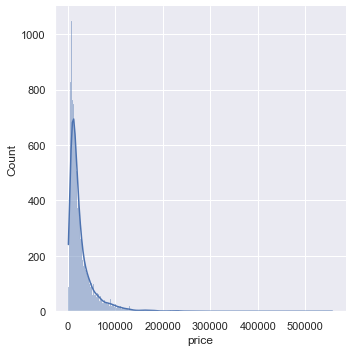

In [211]:
# target variable: price in USD
cars_df["price"] = pd.to_numeric(cars_df["price"])
sns.displot(cars_df["price"], kde = True) # big positive skew--will need to check again after filtering for cars that sold
cars_df["price"].describe()
# looks like most cars are in the $10000 - $100000 range

<AxesSubplot:xlabel='price'>

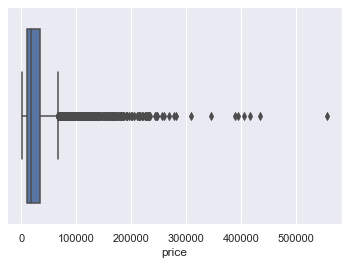

In [212]:
sns.boxplot(data = cars_df, x = "price")

# Exploring and cleaning the features

### Observing the 'make' feature

In [213]:
cars_df["make"].value_counts()

BMW                  1734
Mercedes-Benz        1108
Porsche               767
Ford                  658
Toyota                654
                     ... 
Backdraft Racing        1
Race Car Replicas       1
Skoda                   1
MEV                     1
Shelby                  1
Name: make, Length: 112, dtype: int64

<AxesSubplot:xlabel='price', ylabel='make'>

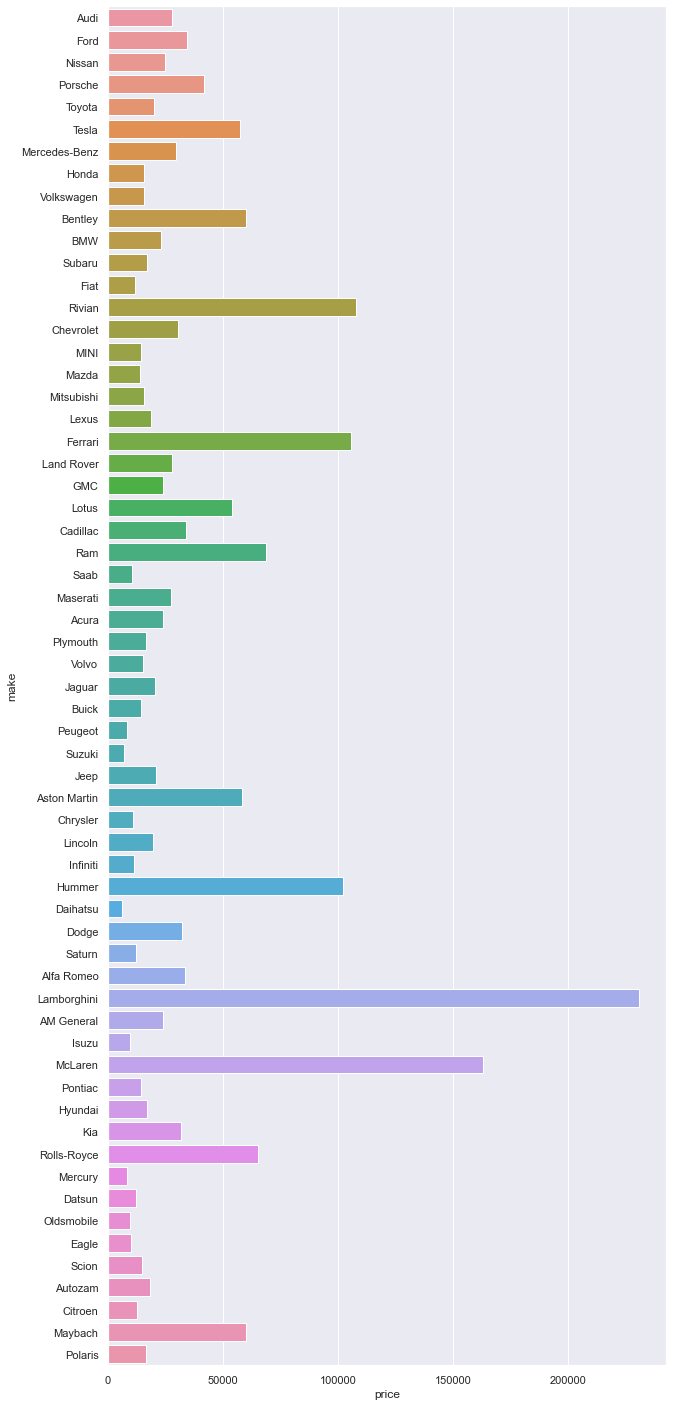

In [214]:
sns.set(rc={'figure.figsize':(10,25)}) # enlarging the plot so brand names are legible
sns.barplot(data = cars_df[cars_df["make"].isin(cars_df["make"].value_counts()[cars_df["make"].value_counts() >= 5].index)], x = "price", y = "make", ci = False)
# plotting makes that have had 5 or more listings
# Usual suspects but hummers are curiously expensive, EV detecting features should sort this out

### Cleaning the 'model' feature
- 'Save' was appended to each model name as a result of the scraping

In [215]:
cars_df["model_clean"] = cars_df["model"].str.replace("Save", "")
cars_df["model_clean"]
cars_df["model_clean"].head()
cars_df["model_clean"].tail() # looks good

9958        Defender
9959    Land Cruiser
9960        Focus ST
9961      CLS 63 AMG
9962             MR2
Name: model_clean, dtype: object

### Cleaning the 'mileage' feature
- removing the comma and making it numeric

In [216]:
# removing commas from the mileage numbers
cars_df["mileage_clean"] = cars_df["mileage"].str.replace(",", "")
# using regular expressions to extract numeric characters from the mileage column
cars_df["mileage_clean"] = cars_df["mileage_clean"].str.extract('([0-9]+)')
cars_df[["mileage", "mileage_clean"]][cars_df["mileage_clean"].isna()] # looks good, 24 listings with TMU (missing/broken odometer in most cases)
# TODO drop rows with missing mileage for the modeling set

,mileage,mileage_clean
335,TMU - No odometer,NaN
386,No Odometer — TMU,NaN
3036,No Odometer - TMU,NaN
3078,No odometer - TMU,NaN
3166,No Odometer - TMU,NaN
3451,Odometer Broken - TMU,NaN
4525,No Odometer - TMU,NaN
4956,No Odometer — TMU,NaN
5583,TMU,NaN
5640,TMU,NaN


In [217]:
cars_df["mileage_clean"] = pd.to_numeric(cars_df["mileage_clean"])
cars_df["mileage_clean"].describe()

count      9939.000000
mean      76014.808733
std       55231.380232
min           5.000000
25%       33300.000000
50%       67700.000000
75%      107100.000000
max      467400.000000
Name: mileage_clean, dtype: float64

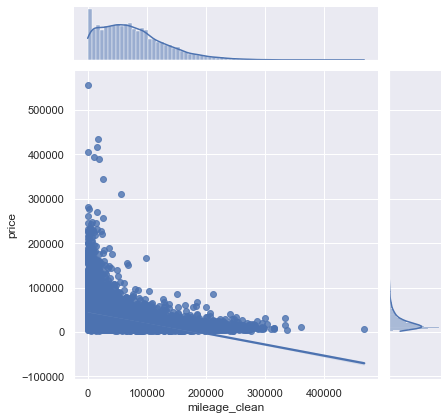

In [218]:
sns.jointplot(data = cars_df, x = "mileage_clean", y = "price", kind = "reg")
# negative relationship between mileage and price, as expected

### cleaning the title_status feature
- need to create a binary clean/not clean title feature
- might be beneficial to split the title status column into 'location' and 'description'

In [219]:
# Making a column "title_desc" a binary feature based on if the string 'clean' appears in the title_status column
# if 'clean' is in the title_desc column: 'clean'
# otherwise 'other'
cars_df["title"] = np.where(cars_df["title_status"].str.lower().str.contains("clean"), "clean", "other")
cars_df.value_counts("title")

title
clean    9837
other     126
dtype: int64

Text(0, 0.5, 'Mean Price')

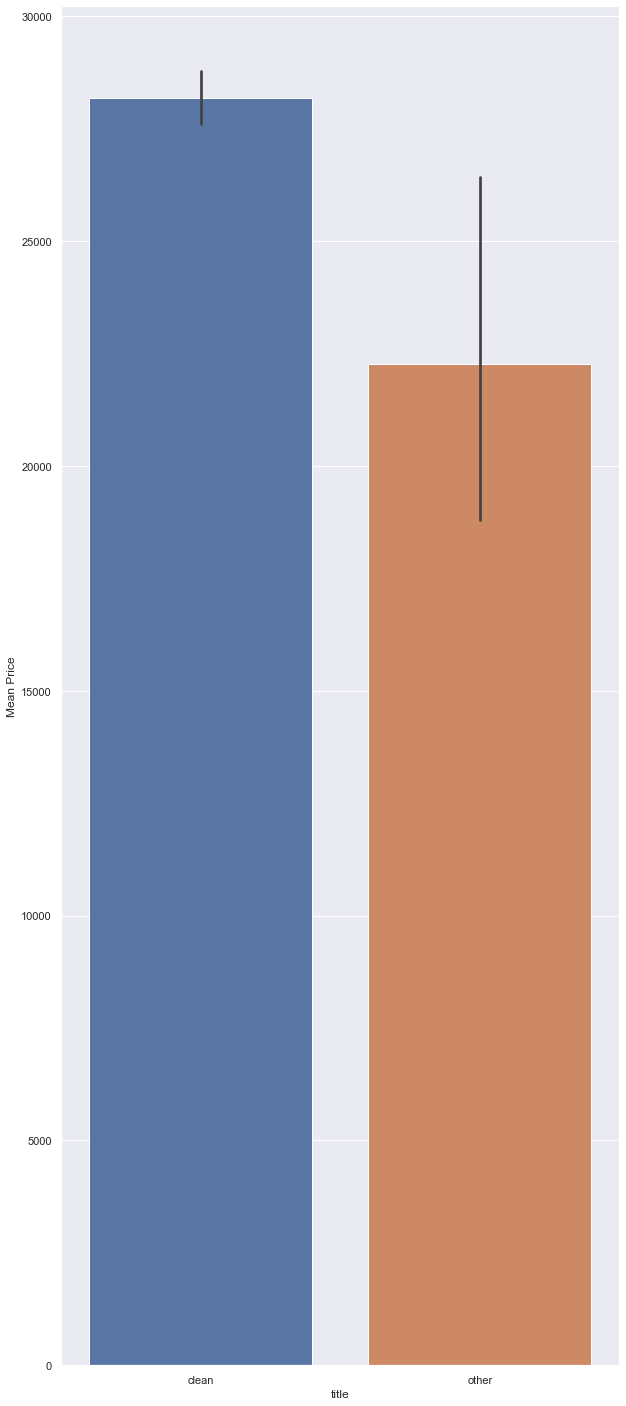

In [220]:
title_price = sns.barplot(data = cars_df, x = "title", y = "price")
title_price.set_ylabel("Mean Price")
# expected result, clean titles bring in more $ on average

In [221]:
# checking feature engineering by pulling up the title_desc column next to each other for cases where "Clean" was not in the original title_status column
cars_df[["title_status", "title"]][cars_df["title"] == "other"]

,title_status,title
102,Not Actual Mileage (KY),other
235,Exceeds Mechanical Limits (PA),other
288,Registered (VT),other
313,Not Actual Mileage (VA),other
314,Registered (ME),other
...,...,...
9733,Lein (TX),other
9783,Odometer Discrepancy (AZ),other
9796,Salvage (MD),other
9827,Odometer Discrepancy (OH),other


### Cleaning the Engine Feature
#### Need to engineer
- `fuel type`: object (gas, diesel, electric, hybrid)
- `displacement`: numeric (in L and in come cases, cc)--cc can be converted into L
- `num_cylinders`: numeric
- forced induction dummies: `turbo`, `supercharged`

### Engineering the `fuel_type` feature taking the values `electric`, `diesel`, `hybrid`, or `gas`

In [222]:
# engineering `fuel_type` feature to take the values electric, hybrid, diesel, gas
cars_df["fuel_type"] = np.where(cars_df["engine"].str.lower().str.contains("electric"), "electric",
                                np.where(cars_df["make"] == "Tesla", "electric",
                                         np.where(cars_df["engine"].str.lower().str.contains("motor"), "electric",
                                np.where(cars_df["engine"].str.lower().str.contains("diesel"), "diesel",
                                         np.where(cars_df["engine"].str.lower().str.contains("hybrid"), "hybrid", "gas")))))

In [223]:
cars_df["fuel_type"].value_counts()

gas         9176
diesel       437
electric     299
hybrid        51
Name: fuel_type, dtype: int64

In [224]:
cars_df["fuel_type"].isna().sum()

0

Text(0, 0.5, 'Mean Price')

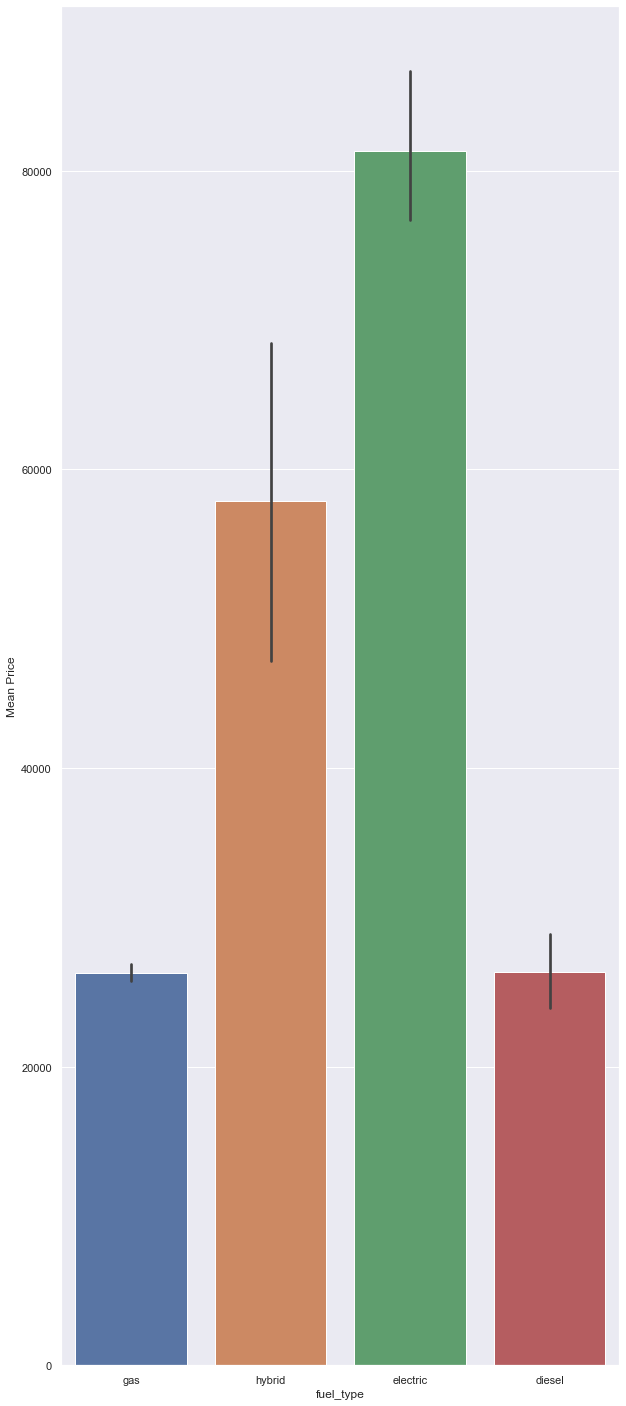

In [225]:
# plotting the average price by fuel type
fuel_type_price = sns.barplot(data = cars_df, x = "fuel_type", y = "price")
fuel_type_price.set_ylabel("Mean Price")
# expected results

### Engineering the `displacement` feature, describing the displacement of non-elecric cars measured in Liters
- cars with engine displacment measured in cc will be converted to L
- 1 cc = 0.001 L

In [226]:
# using regular expressions to match digits separated by periods and followed by L, digits followed by cc, or just digits separated by a period in the engine column
cars_df["displacement"] = cars_df['engine'].str.strip().str.lower().str.extract('(\d+\.\d+L|\d+cc|\d+\.\d+)')
# inspecting regex results
cars_df["displacement"].value_counts()

3.0      1211
2.0       758
4.0       615
5.0       531
2.5       522
         ... 
2.25        1
1.2         1
548cc       1
7.2         1
2.85        1
Name: displacement, Length: 85, dtype: int64

In [227]:
# removing cc from the end before converting to numeric
cars_df["displacement"] = cars_df["displacement"].str.replace("cc", "")
# converting to numeric
cars_df["displacement"] = pd.to_numeric(cars_df["displacement"])

In [228]:
# setting electric cars to have a displacement of 0 as they are not internal combustion engines
cars_df["displacement"][cars_df["fuel_type"] == "electric"] = 0
# fixing the rogue double-period included on the Fiat Abarth at index 5223 (data quality issue)
cars_df["displacement"].iloc[5233] = 1.4

/var/folders/hr/r030s1ps2h10bm8_k582nzfc0000gn/T/ipykernel_1807/2439162321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df["displacement"][cars_df["fuel_type"] == "electric"] = 0
/var/folders/hr/r030s1ps2h10bm8_k582nzfc0000gn/T/ipykernel_1807/2439162321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df["displacement"].iloc[5233] = 1.4


In [229]:
# conditionally converting cc to L if 'cc' in the engine description
# conversion rate: 1cc = 0,001L
cars_df["displacement"][cars_df["engine"].str.lower().str.contains("cc")] = cars_df["displacement"] * 0.001
cars_df["displacement"].describe() # all electric cars have a displacement of 0

/var/folders/hr/r030s1ps2h10bm8_k582nzfc0000gn/T/ipykernel_1807/2651738403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df["displacement"][cars_df["engine"].str.lower().str.contains("cc")] = cars_df["displacement"] * 0.001


count    9960.000000
mean        3.640426
std         1.556017
min         0.000000
25%         2.500000
50%         3.500000
75%         4.800000
max        10.800000
Name: displacement, dtype: float64

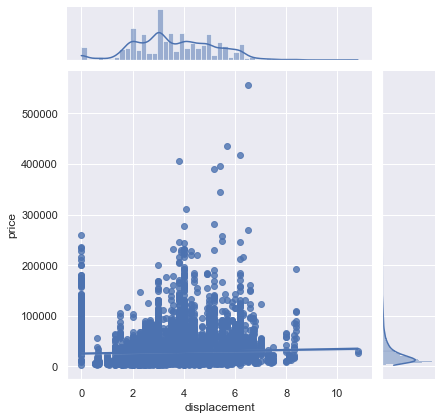

In [230]:
# plotting the relationship between displacement in L and price
sns.jointplot(data = cars_df, x = "displacement", y = "price", kind = "reg")

In [231]:
cars_df[["fuel_type", "engine", "displacement"]][cars_df["displacement"].isna()]
# TODO these will likely need to be dropped, minimal engine details

,fuel_type,engine,displacement
7373,gas,Chevrolet 350 V8,NaN
8733,gas,"Toronto ON, Canada",NaN
9749,gas,V12,NaN


### Engineering the num_cylinders feature, describing the number of cylinders a non-electric, non-rotary car has

In [232]:
# num_cylinders feature (value will be 0 for electric cars and rotary engines, they will instead have dummies to indicate their status)
cars_df['num_cylinders'] = cars_df['engine'].str.strip().str.lower().str.extract('(\d+)$')
cars_df["num_cylinders"][cars_df["fuel_type"] == "electric"] = 0
cars_df["num_cylinders"][cars_df["engine"].str.lower().str.contains("rotary")] = 0
cars_df["num_cylinders"].value_counts() # not a perfect outcome with the regex

/var/folders/hr/r030s1ps2h10bm8_k582nzfc0000gn/T/ipykernel_1807/2294221420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df["num_cylinders"][cars_df["fuel_type"] == "electric"] = 0
/var/folders/hr/r030s1ps2h10bm8_k582nzfc0000gn/T/ipykernel_1807/2294221420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df["num_cylinders"][cars_df["engine"].str.lower().str.contains("rotary")] = 0


8     3678
6     3254
4     2050
0      339
12     223
10     173
5      145
3       83
2        5
Name: num_cylinders, dtype: int64

In [233]:
# converting type of `num_cylinders` to numeric
cars_df["num_cylinders"] = pd.to_numeric(cars_df["num_cylinders"])

<AxesSubplot:xlabel='num_cylinders', ylabel='price'>

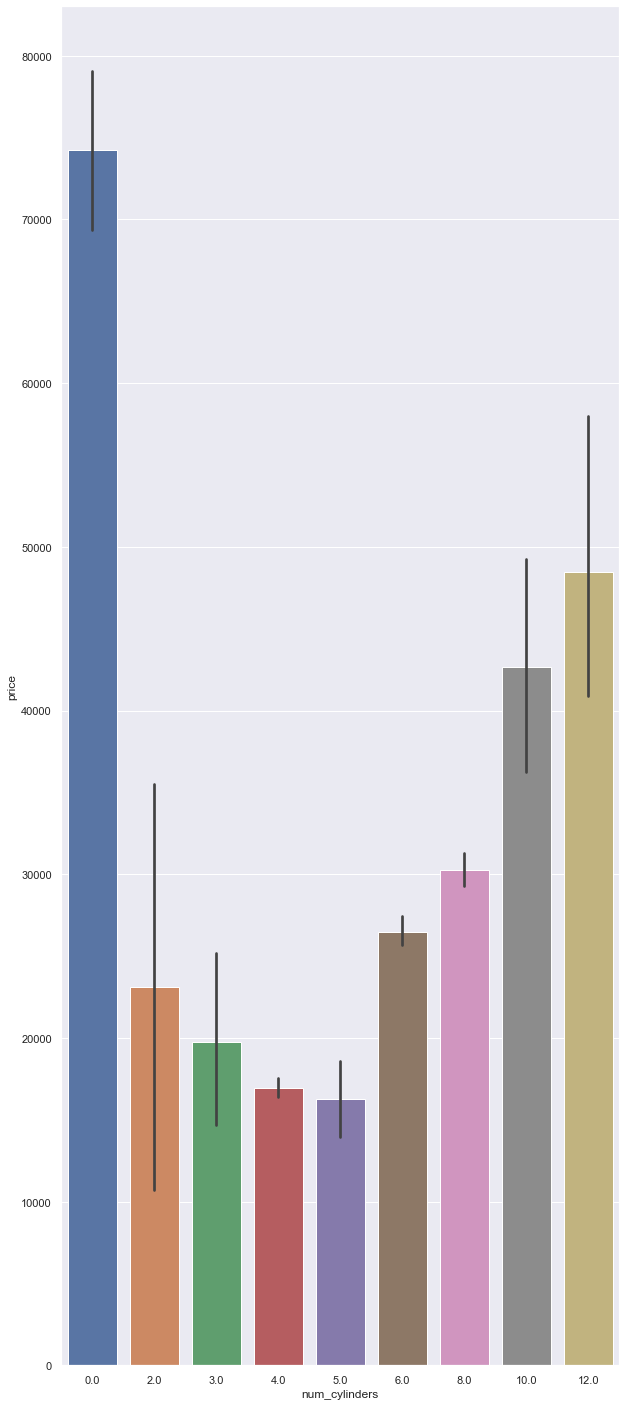

In [234]:
sns.barplot(data = cars_df, x = "num_cylinders", y = "price")

In [235]:
cars_df[cars_df["num_cylinders"].isna()] # 13 cases can't be captured with regex
# TODO drop failed capture cases with NaN for num_cylinders

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,reserve_status,num_views,end_datetime,num_photos,model_clean,mileage_clean,title,fuel_type,displacement,num_cylinders
828,Ferrari,TestarossaSave,"12,800",ZFFSG17A9K0079956,Clean (FL),"Miami, FL 33126",AutoSourceGroup,4.9L 12-Cylinder,Rear-wheel drive,Manual (5-Speed),...,Reserve,22591.0,"Oct 3, 2022 1:30 PM EDT",196,Testarossa,12800.0,clean,gas,4.9,NaN
2411,Eagle,TalonSave,"73,400",4E3CT64U3LE138460,Clean (CO),"Aurora, CO 80013",theeaglehaslanded,2.0L Turbocharged 4-Cylinder,4WD/AWD,Manual (5-Speed),...,No reserve,9470.0,"Jun 20, 2022 4:17 PM EDT",89,Talon,73400.0,clean,gas,2.0,NaN
4355,GMC,SuburbanSave,"189,200",1GKGK26J6TJ755547,Clean (MS),"Ocean Springs, MS 39564",GPWooden,5.9L I6 turbodiesel,4WD/AWD,Automatic (4-Speed),...,No reserve,12265.0,"Jan 28, 2022 2:53 PM EST",161,Suburban,189200.0,clean,diesel,5.9,NaN
4687,Ferrari,TestarossaSave,"47,200",ZFFSG17A8H0072019,Clean (CA),"Saddle Brook, NJ 07663",europeanautogallerynj,4.9L 12-Cylinder,Rear-wheel drive,Manual (5-Speed),...,Reserve,42886.0,"Dec 27, 2021 1:31 PM EST",134,Testarossa,47200.0,clean,gas,4.9,NaN
5916,BMW,330iSave,"127,200",WBAEV53483KM04995,Clean (CA),"San Diego, CA 92101",mikasaur,3.0L,Rear-wheel drive,Manual (6-Speed),...,No reserve,14477.0,"Sep 21, 2021 2:18 PM EDT",195,330i,127200.0,clean,gas,3.0,NaN
6091,Toyota,HiAceSave,"85,800",LH850009468,Clean (WA),"Liberty Lake, WA 99019",eagle,2.4L Diesel,4WD/AWD,Manual (5-Speed),...,Reserve,75883.0,"Sep 8, 2021 5:06 PM EDT",114,HiAce,85800.0,clean,diesel,2.4,NaN
6882,GMC,CanyonSave,180,1GTH6FEN0K1333675,Clean (IL),"Lisle, IL 60532",dmotorworks,3.6L V6 Supercharged,4WD/AWD,Automatic (8-Speed),...,Reserve,13379.0,"Jul 7, 2021 3:50 PM EDT",59,Canyon,180.0,clean,gas,3.6,NaN
7110,Mercedes-Benz,ML350 BlueTecSave,"99,700",4JGDA2EBXEA320105,Clean (CA),"Long Beach, CA 90806",allin938,3.0L V6 Turbodiesel,4WD/AWD,Automatic (7-Speed),...,Reserve,5984.0,"Jun 15, 2021 4:03 PM EDT",200,ML350 BlueTec,99700.0,clean,diesel,3.0,NaN
7215,Chevrolet,HHRSave,"92,600",3GNDA73X48S618871,Clean (OH),"Cuyahoga Falls, OH 44223",snailsNdew,2.0L I4 Turbo,Front-wheel drive,Manual (5-speed),...,No reserve,9641.0,"Jun 7, 2021 2:30 PM EDT",108,HHR,92600.0,clean,gas,2.0,NaN
8733,Porsche,BoxsterSave,"38,000",WP0CA2980YU627638,Clean (ON),"Toronto ON, Canada",Turbodan,"Toronto ON, Canada",Rear-wheel drive,Manual (5-Speed),...,Reserve,NaN,"Dec 11, 2020 4:03 PM EST",108,Boxster,38000.0,clean,gas,NaN,NaN


### Engineering the `is_rotary` feature to designate rotary engines
- default is 0 for non-rotary
- 1 for rotary

In [236]:
cars_df["is_rotary"] = np.where(cars_df["engine"].str.lower().str.contains("rotary"), 1 , 0)
cars_df["is_rotary"].value_counts() # checking

0    9923
1      40
Name: is_rotary, dtype: int64

<AxesSubplot:xlabel='is_rotary', ylabel='price'>

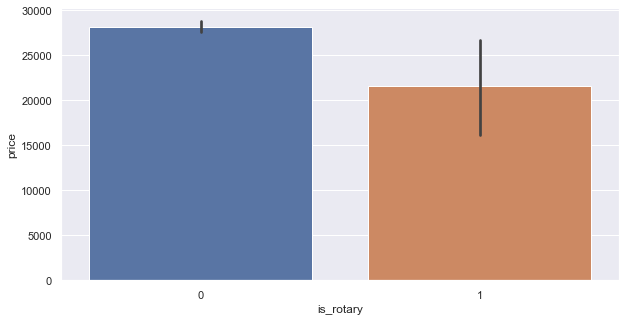

In [237]:
# plotting average price of rotary/non-rotary engines
sns.set(rc={'figure.figsize':(10,5)}) # enlarging the plot so x-axis is legible
sns.barplot(data = cars_df, x = "is_rotary", y = "price")

### Engineering the `num_electric_motors` feature by searching the text contained in the engine column for electric cars
- default value will be 0 for non-electric cars
- feature will be continuous ranging from 0-4

In [238]:
# checking different engine types for electric cars
cars_df[cars_df["fuel_type"] == "electric"]["engine"].value_counts()

Dual Electric Motors                                       117
Quad Electric Motors                                        53
Single Electric Motor                                       42
Triple Electric Motors                                      21
Dual Motors                                                 21
Single Motor                                                 6
 Quad Electric Motors                                        6
 Triple Electric Motors                                      4
Dual Motor 90D                                               4
Dual Motor 75D                                               4
Single Motor 85                                              4
Single Motor P85                                             3
 Dual Electric Motors                                        2
EV                                                           2
Single Motor 75                                              2
Dual Electric Motor                                    

In [239]:
# making a feature num_electric_motors to take 4, 3, 2, 1, or 0 (for non-electric cars) based on the text contained in the value count results from the prior cell
# value for all non-electric cars will be 0
cars_df["num_electric_motors"] = 0

# base value for electric cars will be 1
cars_df["num_electric_motors"][cars_df["fuel_type"] == "electric"] = 1

# if the fuel type is 'electric' and the engine feature contains the string 'dual' in the engine column, the value will be 2
cars_df["num_electric_motors"][(cars_df["fuel_type"] == "electric") & (cars_df["engine"].str.lower().str.contains("dual"))] = 2

# if the fuel type is 'electric' and the engine feature contains the string 'three' in the engine column, the value will be 3
cars_df["num_electric_motors"][(cars_df["fuel_type"] == "electric") & (cars_df["engine"].str.lower().str.contains("three"))] = 3

# if the fuel type is 'electric' and the engine feature contains the string 'triple' in the engine column, the value will be 3
cars_df["num_electric_motors"][(cars_df["fuel_type"] == "electric") & (cars_df["engine"].str.lower().str.contains("triple"))] = 3

# if the fuel type is 'electric' and the engine feature contains the string 'quad' in the engine column, the value will be 4
cars_df["num_electric_motors"][(cars_df["fuel_type"] == "electric") & (cars_df["engine"].str.lower().str.contains("quad"))] = 4

# checking the work
cars_df[cars_df["fuel_type"] == "electric"][["engine", "num_electric_motors"]] # good

/var/folders/hr/r030s1ps2h10bm8_k582nzfc0000gn/T/ipykernel_1807/134454734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df["num_electric_motors"][cars_df["fuel_type"] == "electric"] = 1
/var/folders/hr/r030s1ps2h10bm8_k582nzfc0000gn/T/ipykernel_1807/134454734.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df["num_electric_motors"][(cars_df["fuel_type"] == "electric") & (cars_df["engine"].str.lower().str.contains("dual"))] = 2
/var/folders/hr/r030s1ps2h10bm8_k582nzfc0000gn/T/ipykernel_1807/134454734.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

,engine,num_electric_motors
8,Triple Electric Motors,3
22,Quad Electric Motors,4
24,Quad Electric Motors,4
34,Dual Electric Motors,2
44,Dual Electric Motors,2
...,...,...
9103,EV,1
9288,Single Motor 85,1
9373,Single Motor P85,1
9444,Dual Electric Motors,2


In [240]:
cars_df["num_electric_motors"].isna().sum()

0

In [241]:
cars_df.value_counts("num_electric_motors") # good

num_electric_motors
0    9664
2     152
1      61
4      59
3      27
dtype: int64

### Cleaning the 'drivetrain' feature

In [242]:
cars_df.value_counts("drivetrain") # already clean

drivetrain
Rear-wheel drive     5168
4WD/AWD              3942
Front-wheel drive     853
dtype: int64

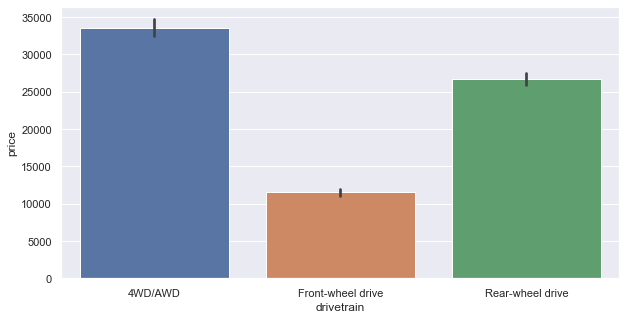

In [243]:
drivetrain_price = sns.barplot(data = cars_df, x = "drivetrain", y = "price")
# Historically, FWD cars average lower prices when compared with AWD/4WD and RWD cars

### Cleaning the 'transmission' Feature
- making a binary feature 'trans' taking the values ('automatic', 'manual')

In [244]:
# engineering a binary variable to indicate whether the car in the listing has an automatic or manual gearbox
cars_df["trans"] = np.where(cars_df["transmission"].str.lower().str.contains("manual"), "manual", "automatic")
cars_df["trans"].value_counts()
cars_df["trans"].isna().sum()
cars_df[["transmission", "trans"]] # looks good

,transmission,trans
0,Manual (5-Speed),manual
1,Automatic (CVT),automatic
2,Automatic (6-Speed),automatic
3,Automatic (7-Speed),automatic
4,Manual (5-Speed),manual
...,...,...
9958,Manual (5-speed),manual
9959,Manual (4-speed),manual
9960,Manual (6-speed),manual
9961,Automatic (7-speed MCT),automatic


<AxesSubplot:xlabel='trans', ylabel='count'>

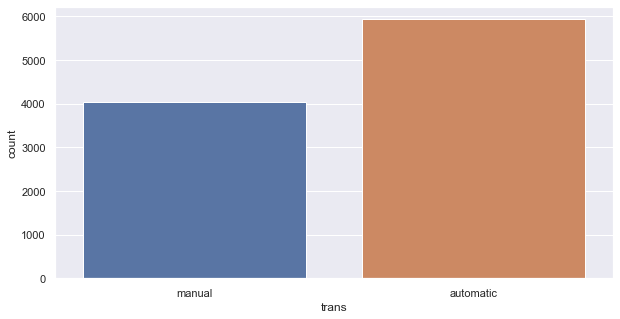

In [245]:
sns.countplot(data = cars_df, x = "trans")
# automatics are more prevalent on the site

Text(0, 0.5, 'Mean Price')

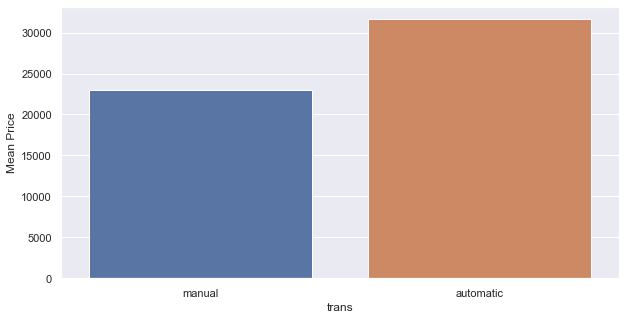

In [246]:
transmission_price = sns.barplot(data = cars_df, x = "trans", y = "price", ci = False)
transmission_price.set_ylabel("Mean Price")
# somewhat unexpected result for an enthusiast car auction site

### Cleaning the 'body_style' feature
- predefined value entered by the site, should be clean

In [247]:
cars_df["body_style"].value_counts()
# 8 body styles

Coupe            2385
Sedan            2339
SUV/Crossover    1772
Convertible      1677
Truck             610
Wagon             573
Hatchback         450
Van/Minivan       157
Name: body_style, dtype: int64

<AxesSubplot:xlabel='body_style', ylabel='count'>

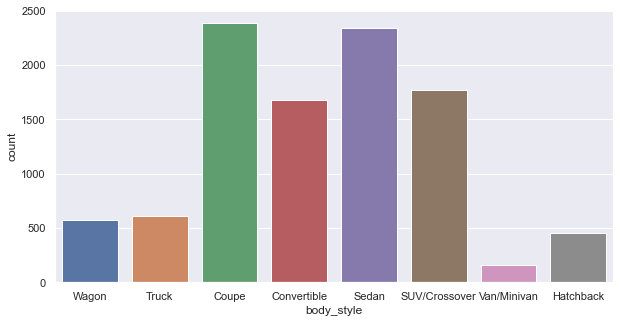

In [248]:
# ploting the body style counts
sns.set(rc={'figure.figsize':(10,5)}) # enlarging the plot so x-axis is legible
sns.countplot(data = cars_df, x = "body_style")

Text(0, 0.5, 'Mean Price')

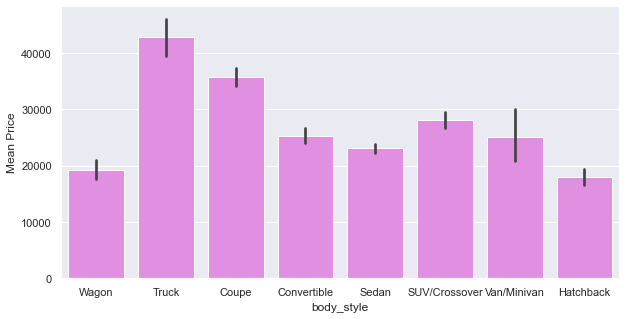

In [249]:
sns.set(rc = {"figure.figsize":(10, 5)})
body_style_price = sns.barplot(data = cars_df, x = "body_style", y = "price", color = "violet")
body_style_price.set_ylabel("Mean Price")
# this is surprising, trucks are selling for the most on average
# Not much variation in sedan prices based on the CI

# Cleaning the 'seller_type' feature

In [250]:
cars_df["seller_type"].value_counts()
# only two root types of sellers, private party and dealer
# some dealers have stipulations attached to the sale, hence the inflated number of categories
# the overwhelming majority are private party sellers

Private Party                                 7932
Dealer                                        1760
Dealer ($40 Temporary Tag)                      15
Dealer ($40 Temp Tag)                           13
Private Party (Lien on title)                   10
                                              ... 
Dealer ($99 Fee for California Buyers)           1
Dealer (GA Sales Tax + $137 Temporary Tag)       1
Dealer ($99 Document Fee)                        1
Dealer ($250)                                    1
Dealer (Sales Tax & Title Fees)                  1
Name: seller_type, Length: 166, dtype: int64

In [251]:
# engineering a binary feature from seller_type with values (Private, Dealer)
cars_df["seller"] = np.where(cars_df["seller_type"].str.lower().str.contains("private"), "private", "dealer")
cars_df["seller"].value_counts() # good

private    7947
dealer     2016
Name: seller, dtype: int64

<AxesSubplot:xlabel='seller', ylabel='count'>

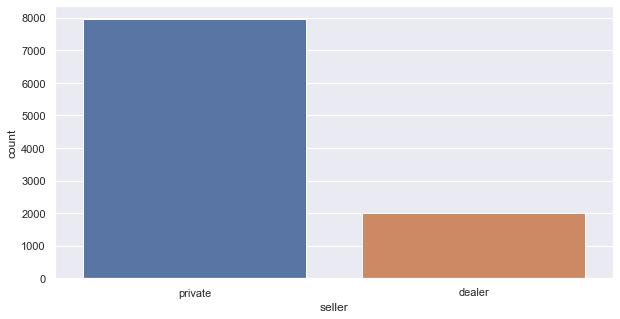

In [252]:
sns.countplot(data = cars_df, x = "seller")

Text(0, 0.5, 'Mean Price')

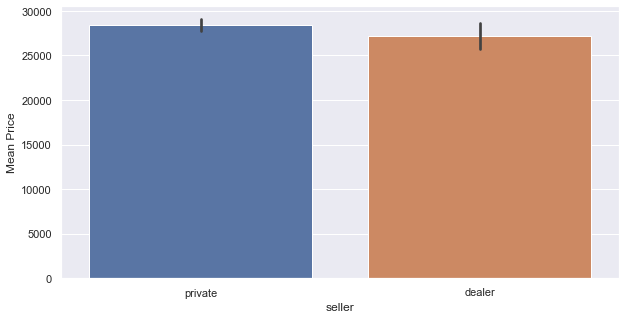

In [253]:
seller_price = sns.barplot(data = cars_df, x = "seller", y = "price")
seller_price.set_ylabel("Mean Price")
# looks like there isn't much price difference between sellers, confidence intervals overlap

### Cleaning the car "year" column

In [254]:
# viewing summary statistics for the year feature
cars_df["year"].describe()

count     9963
unique      44
top       2008
freq       461
Name: year, dtype: object

In [255]:
cars_df["year"].value_counts()
# only one strange record where "year" == 'consumer'

2008        461
2006        436
2004        412
2003        388
2007        384
2005        376
2013        366
2001        359
2016        350
2002        338
2015        327
2014        323
2000        318
2011        311
2017        310
2018        277
1995        273
2012        263
1999        250
1994        236
2022        229
2009        228
1996        227
2019        219
2010        211
1997        201
1991        187
2021        183
1992        176
2020        167
1993        161
1990        159
1998        157
1989        117
1988        115
1986        107
1987        106
1985         74
1984         56
1982         43
1983         42
1981         27
2023         12
consumer      1
Name: year, dtype: int64

In [256]:
cars_df[cars_df["year"] == 'consumer'] # extremely odd record, no year info to be found when accessing the URL
cars_df = cars_df[cars_df["year"] != 'consumer'] # removing the record
cars_df[cars_df["year"] == 'consumer'] # removed

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,num_photos,model_clean,mileage_clean,title,fuel_type,displacement,num_cylinders,is_rotary,num_electric_motors,trans


In [257]:
# viewing the most recent year from the listings
cars_df["year"].max()

'2023'

In [258]:
# viewing the earliest year from the listings
cars_df["year"].min()

'1981'

<AxesSubplot:xlabel='year', ylabel='count'>

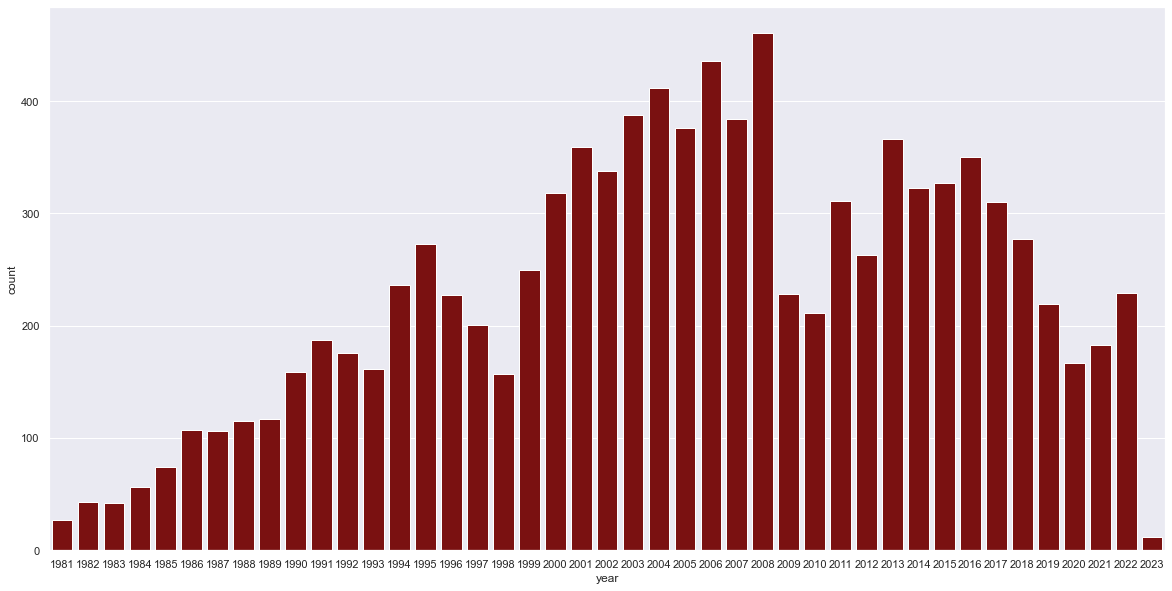

In [259]:
# plotting the distribution of car years
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(data = cars_df.sort_values("year"), x = "year", color = "darkred") # lots of records from the mid 2000s
# TODO keep 'year' categorical or make it numeric?

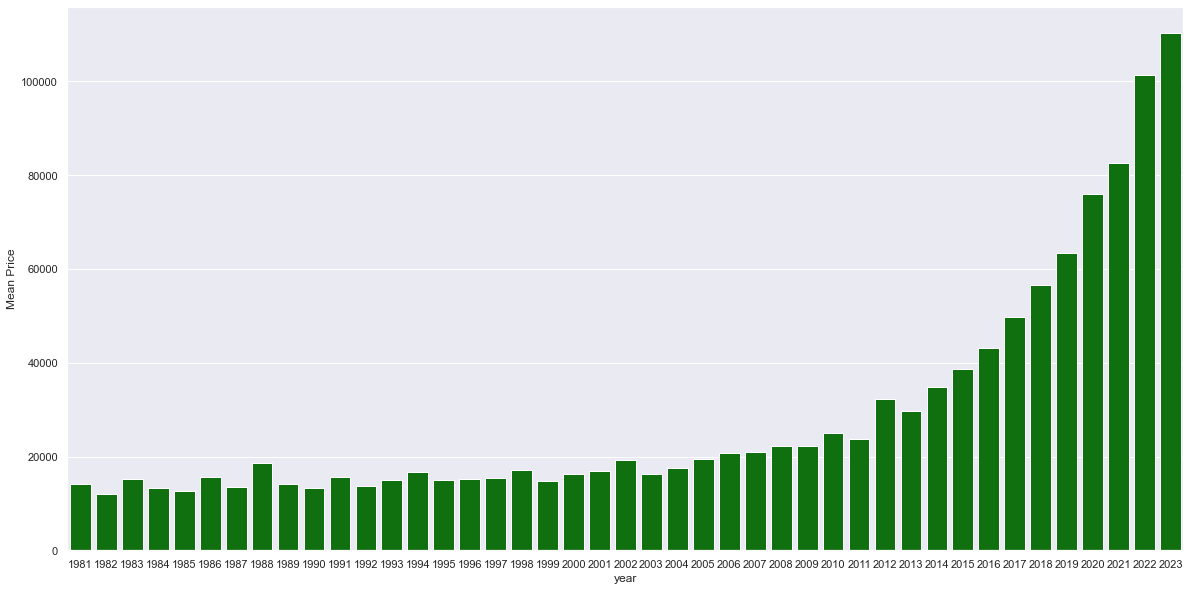

In [260]:
sns.set(rc={'figure.figsize':(20,10)})
year_price = sns.barplot(data = cars_df.sort_values("year"), x = "year", y = "price", ci = False, color = "green")
year_price.set_ylabel("Mean Price")
plt.show()
# looks like newer cars are selling for more on average, makes sense

### Cleaning the auction_outcome column
- engineering new feature "outcome" which will take the values ("not sold", "sold")
- Only listings that sold will be used in modeling, 'reserve not met' listings will be useful for vis

In [261]:
cars_df["auction_outcome"].value_counts()

Reserve not met, bid to     2028
Sold toAoC93                  42
Sold tosellmeanother1975      38
Sold toDiamondMotorworks      29
Sold toiamRonin               28
                            ... 
Sold toThePuller               1
Sold toreggie5500              1
Sold toeswack6                 1
Sold toWaj90210                1
Sold toECRacer                 1
Name: auction_outcome, Length: 6692, dtype: int64

In [262]:
# creating the 'outcome' column
cars_df["outcome"] = np.where(cars_df["auction_outcome"].str.lower().str.contains("reserve not met"), "not sold", "sold")

In [263]:
cars_df["outcome"].value_counts() # clean

sold        7934
not sold    2028
Name: outcome, dtype: int64

Text(0, 0.5, 'Mean Price')

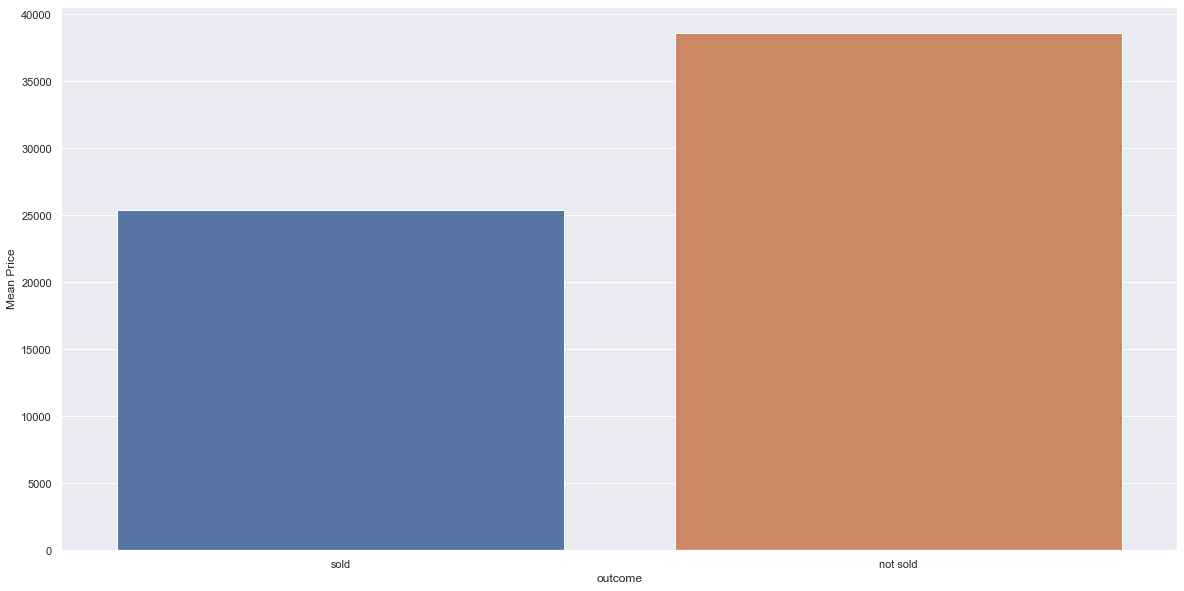

In [264]:
# plotting mean price for each outcome category
outcome_price = sns.barplot(data = cars_df, x = "outcome", y = "price", ci = False)
outcome_price.set_ylabel("Mean Price")

### Cleaning the 'bid_count' feature

In [265]:
cars_df["bid_count"].describe() #clean

count    9962.000000
mean       28.311785
std        13.447805
min         1.000000
25%        18.000000
50%        27.000000
75%        37.000000
max       139.000000
Name: bid_count, dtype: float64

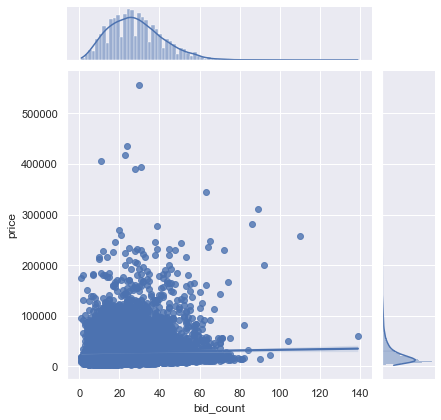

In [266]:
sns.jointplot(data = cars_df, x = "bid_count", y = "price", kind = "reg")

### Cleaning the 'reserve_status' feature

In [267]:
cars_df["reserve_status"].value_counts() #clean

Reserve       6007
No reserve    3955
Name: reserve_status, dtype: int64

Text(0, 0.5, 'Mean Price')

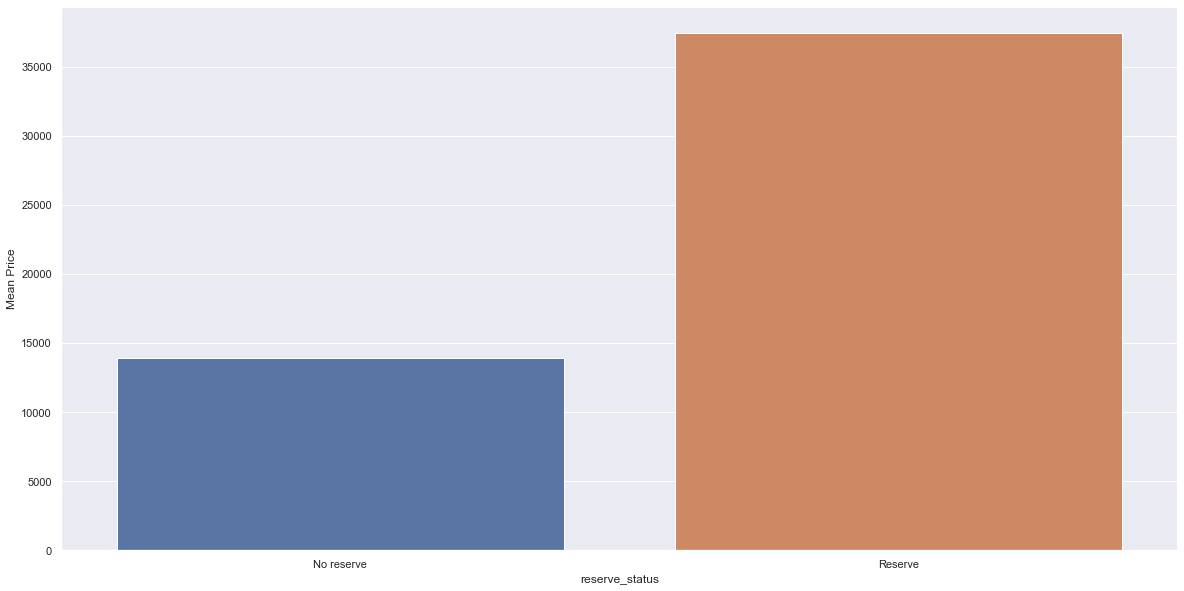

In [268]:
reserve_status_price = sns.barplot(data = cars_df, x = "reserve_status", y = "price", ci = False)
reserve_status_price.set_ylabel("Mean Price")

### Cleaning the 'num_views' feature
- imputing values for the missing data in case the feature proves useful

<AxesSubplot:xlabel='num_views'>

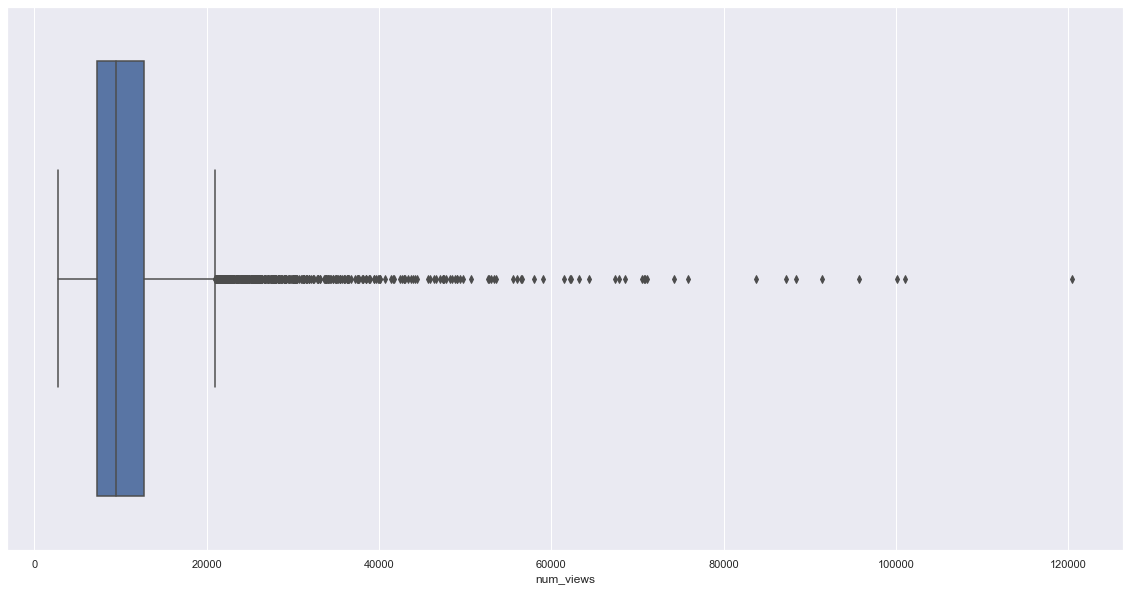

In [269]:
cars_df["num_views"].describe()
sns.boxplot(data = cars_df, x = "num_views")

In [270]:
# using median value imputation to impute the missing values for num_views--the number of views a listing page receives
# median was chosen because of the large number of outliers skewing the mean
cars_df["num_views"].fillna(cars_df["num_views"].median())

0        9032.0
1        7275.0
2       10609.0
3       10057.0
4        5528.0
         ...   
9958     9539.5
9959     9539.5
9960     9539.5
9961     9539.5
9962     9539.5
Name: num_views, Length: 9962, dtype: float64

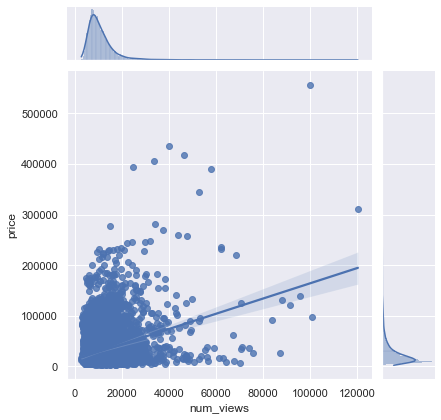

In [271]:
num_views_price = sns.jointplot(data = cars_df, x = "num_views", y = "price", kind = "reg")

### Changing the auction end format to datetime

In [272]:
# using pd.to_datetime on the end_datetime column. Date format from the scrape is standardized and the time zone is present
cars_df["end_datetime"] = pd.to_datetime(cars_df["end_datetime"])
cars_df[cars_df["end_datetime"].isna()] # no missing valuesb

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,model_clean,mileage_clean,title,fuel_type,displacement,num_cylinders,is_rotary,num_electric_motors,trans,outcome


In [273]:
# checking summary statistics for the auction dates
cars_df["end_datetime"].describe(datetime_is_numeric = True) # great datetime handling from describe btw
# earliest auction was June 15, 2020--site has been live for a little over 2 years

count                                   9962
mean     2021-11-14 08:57:55.157598720-05:00
min                2020-06-15 12:00:00-04:00
25%                2021-05-13 13:52:30-04:00
50%                2021-11-30 15:38:30-05:00
75%                2022-06-14 14:25:45-04:00
max                2022-11-18 15:50:00-05:00
Name: end_datetime, dtype: object

In [274]:
# checking the total range of dates from earliest to most recent listing
days_span = cars_df["end_datetime"].max() - cars_df["end_datetime"].min()
months_span = len(pd.date_range(start=cars_df["end_datetime"].min(),end=cars_df["end_datetime"].max(),freq='M'))

print(f"The listings span {days_span} or {months_span} months")
# plot the distribution with monthly breaks (29 breaks)

The listings span 886 days 04:50:00 or 29 months


<AxesSubplot:xlabel='end_datetime', ylabel='Count'>

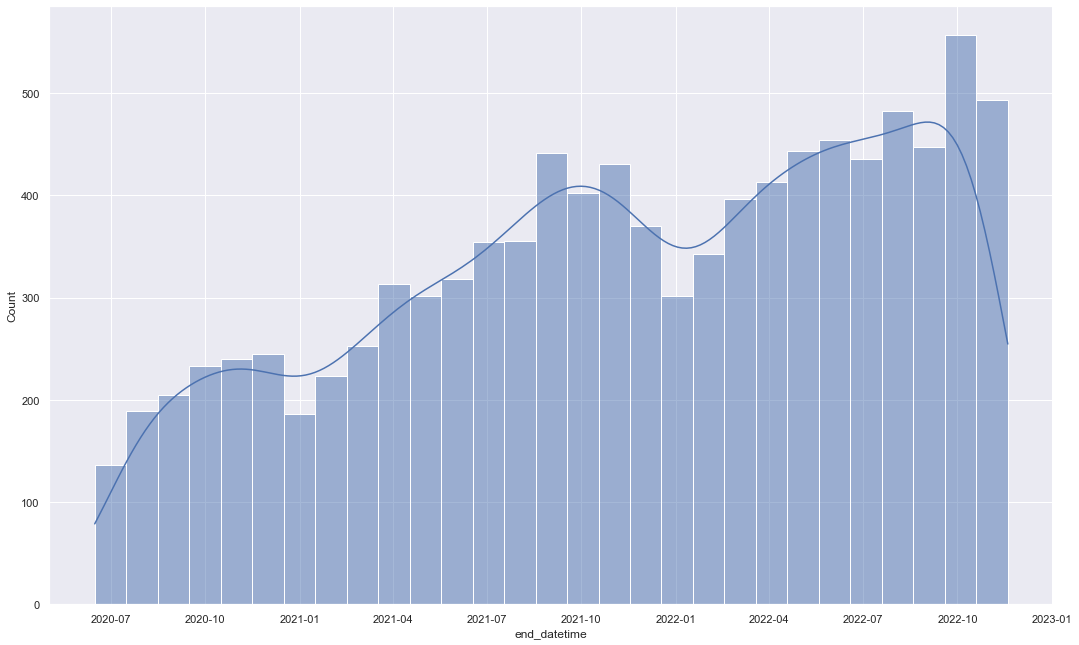

In [275]:
# plotting the distribution over time
sns.set(rc={'figure.figsize':(18,11)}) # enlarging the plot so x-axis is legible
sns.histplot(cars_df["end_datetime"], kde=True, bins = 29)

In [276]:
# feature engineering the day of the week an auction ended on

In [277]:
cars_df["end_weekday"] = cars_df["end_datetime"].dt.day_name()
cars_df["end_weekday"].head()

0      Friday
1      Friday
2    Thursday
3    Thursday
4    Thursday
Name: end_weekday, dtype: object

<AxesSubplot:xlabel='end_weekday', ylabel='count'>

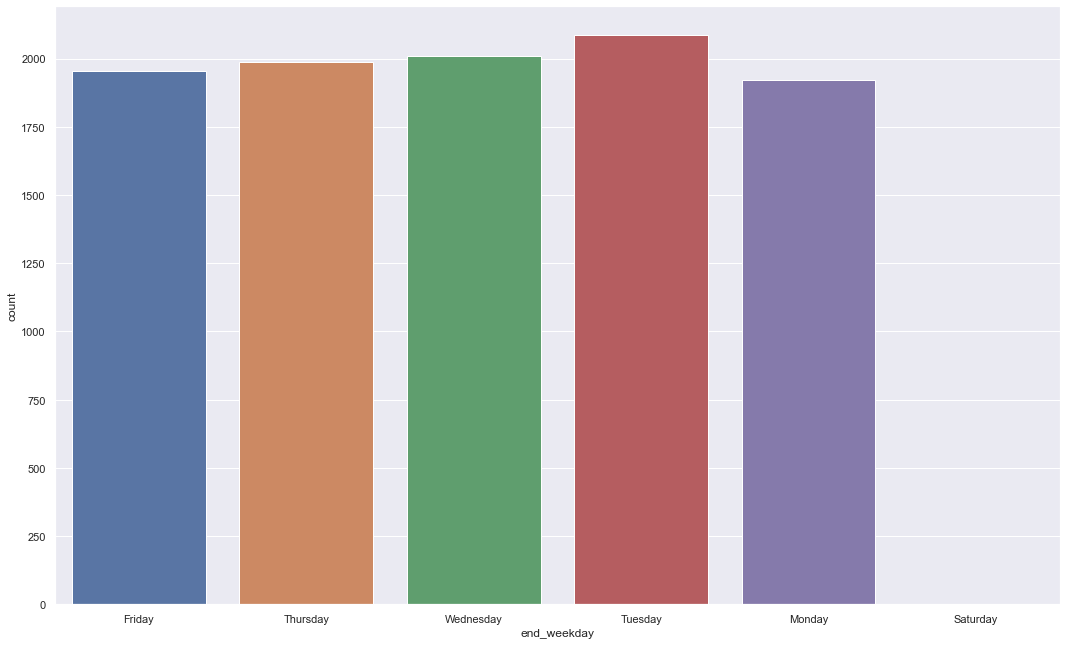

In [278]:
sns.countplot(data = cars_df, x = "end_weekday")

<AxesSubplot:xlabel='end_weekday', ylabel='price'>

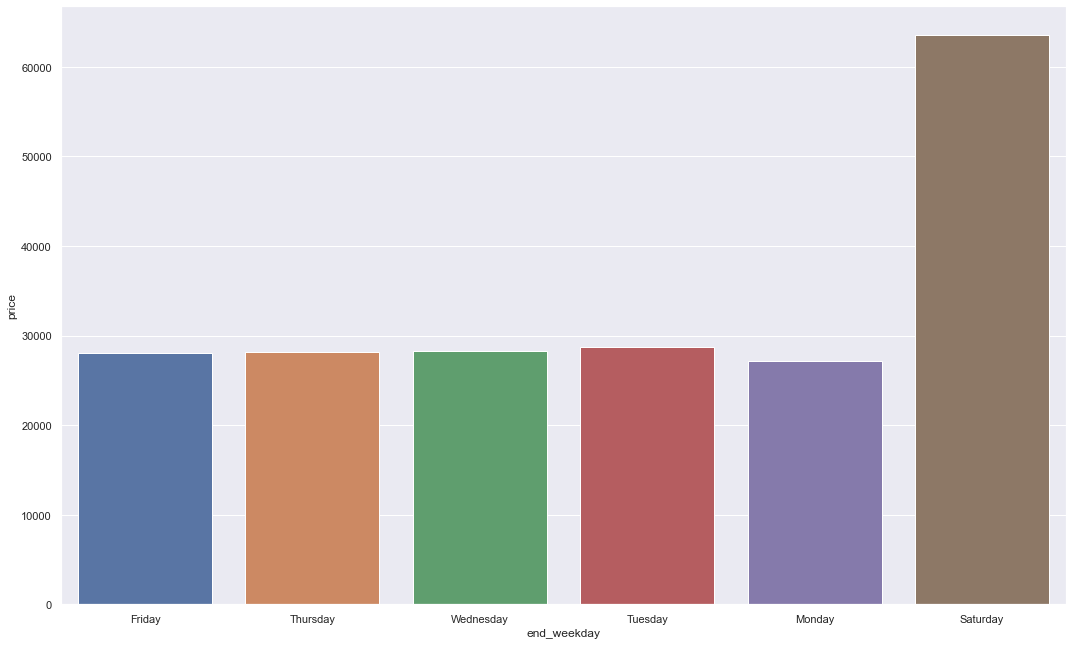

In [279]:
sns.barplot(data = cars_df, x = "end_weekday", y = "price", ci = False)

In [280]:
# !NOTE! the one auction ending on a Saturday is shown below:
# this was an anomaly case, auctions are only supposed to take place M-F
# The car did not sell, and therefore will not be included in the final model
# Very nice 850CSi though...
cars_df[cars_df["end_weekday"] == "Saturday"]

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,mileage_clean,title,fuel_type,displacement,num_cylinders,is_rotary,num_electric_motors,trans,outcome,end_weekday
8993,BMW,850CSiSave,"106,700",WBSEG9323RCD00125,Clean (CA),"Encino, CA 91316",private,5.6L V12,Rear-wheel drive,Manual (6-speed),...,106700.0,clean,gas,5.6,12.0,0,0,manual,not sold,Saturday


### Cleaning the 'num_photos' feature

In [281]:
cars_df["num_photos"].describe() # clean, no missing values

count    9962.000000
mean      116.972295
std        46.757421
min        37.000000
25%        83.000000
50%       106.000000
75%       140.000000
max       443.000000
Name: num_photos, dtype: float64

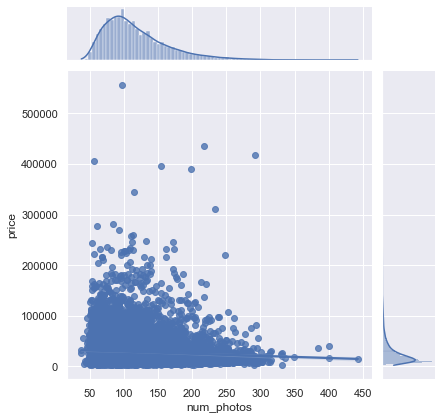

In [282]:
sns.jointplot(data = cars_df, x = "num_photos" , y = "price", kind = "reg")

## Cleaning the location feature to prepare for mapping:


In [320]:
# making a copy of the dataframe to apply the mapping changes
map_df = cars_df.copy()
map_df.head()

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,title,fuel_type,displacement,num_cylinders,is_rotary,num_electric_motors,trans,outcome,end_weekday,ZIP
0,Audi,S6Save,"288,200",WAULA84A5SN121685,Clean (NC),"Raleigh, NC 27609",private,2.2L Turbocharged I5,4WD/AWD,Manual (5-Speed),...,clean,gas,2.2,5.0,0,0,manual,sold,Friday,27609
1,Ford,MaverickSave,200,3FTTW8E3XNRA95168,Clean (CA),"La Mesa, CA 91942",private,2.5L Hybrid I4,Front-wheel drive,Automatic (CVT),...,clean,hybrid,2.5,4.0,0,0,automatic,sold,Friday,91942
2,Nissan,GT-RSave,"39,500",JN1AR5EF5GM290729,Clean (MD),"Silver Spring, MD 20906",private,3.8L Turbocharged V6,4WD/AWD,Automatic (6-Speed),...,clean,gas,3.8,6.0,0,0,automatic,sold,Thursday,20906
3,Audi,R8Save,"10,400",WUABAAFX9J7902416,Clean (CA),"Temecula, CA 92592",private,5.2L V10,Rear-wheel drive,Automatic (7-Speed),...,clean,gas,5.2,10.0,0,0,automatic,sold,Thursday,92592
4,Porsche,BoxsterSave,"55,400",WP0CA298X7U710301,Clean (IL),"Carol Stream, IL 60188",private,2.7L Flat-6,Rear-wheel drive,Manual (5-Speed),...,clean,gas,2.7,6.0,0,0,manual,sold,Thursday,60188


In [300]:
map_df["location"].sample(10, replace = False)

7292         Norwalk, OH 44857
7742    Averill Park, NY 12018
5768     Morrisville, NC 27560
965      Orland Park, IL 60462
2747         Deltona, FL 32725
5161         Atlanta, GA 30306
5827          Coloma, MI 49038
8361        Monterey, CA 93940
5575         Rocklin, CA 95765
8368       Sunnyvale, CA 94087
Name: location, dtype: object

American format seems to be `City`, `State abbreviation` `Zipcode`
Canada format seems to be: `City`, `Province`, `"Canada"`
- Canada format is inconsistent

taking a closer look at the Canada cases
- records are not standardized, some use `CA` instead of `Canada`
- need to separate these from the California records
some of them do have zipcodes...see indexes (4559, 4974, 6892, 8374)

In [284]:
# cases where the last item in the location column is CA--confirming that these are all canada and not california
map_df[map_df["location"].str.strip().str.lower().str[-2:] == "ca"]
# confirmed, 13 cars

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,mileage_clean,title,fuel_type,displacement,num_cylinders,is_rotary,num_electric_motors,trans,outcome,end_weekday
547,Chevrolet,CamaroSave,"7,900",2G1FP22P4V2142328,Clean (Quebec),"Montreal, Quebec, CA",private,5.7L V8,Rear-wheel drive,Manual (6-Speed),...,7900.0,clean,gas,5.7,8.0,0,0,manual,sold,Thursday
1171,Toyota,Land CruiserSave,"229,500 Miles Shown",JT3FJ62G5J0074413,Clean (ON),"Pickering, Ontario, CA",private,5.7L V8,4WD/AWD,Automatic (4-Speed),...,229500.0,clean,gas,5.7,8.0,0,0,automatic,sold,Thursday
1474,Toyota,CelicaSave,"95,700",ST2050009928,Registered (QC),"Montreal, Quebec, CA",private,2.0L Turbocharged I4,4WD/AWD,Manual (5-Speed),...,95700.0,other,gas,2.0,4.0,0,0,manual,sold,Tuesday
1538,Mercedes-Benz,CL600Save,"44,300",WDBPJ76J43A038168,Clean (AB),"Fort Saskatchewan, Alberta, CA",private,5.5L Turbocharged V12,Rear-wheel drive,Automatic (5-Speed),...,44300.0,clean,gas,5.5,12.0,0,0,automatic,not sold,Wednesday
1714,Audi,S4Save,"57,100",WAUHGCFLXFA132703,"Clean (ON, Canada)","Richmond Hill, Ontario, CA",private,3.0L Supercharged V6,4WD/AWD,Manual (6-Speed),...,57100.0,clean,gas,3.0,6.0,0,0,manual,sold,Thursday
4997,BMW,M5Save,"88,800",WBSDE93431BZ99430,Clean (AB),"Edmonton, Alberta, CA",private,5.0L V8,Rear-wheel drive,Manual (6-Speed),...,88800.0,clean,gas,5.0,8.0,0,0,manual,sold,Tuesday
5221,Toyota,CorollaSave,"58,900 Shown - TMU",JT2AE88C8G0231220,Clean (MA),"St. Andrews, Manitoba, CA",dealer,2.0L I4,Rear-wheel drive,Manual (6-Speed),...,58900.0,clean,gas,2.0,4.0,0,0,manual,sold,Monday
6038,Toyota,FJ CruiserSave,"129,900",JTEBU11F970086730,Clean (Alberta),"Canmore, Alberta, CA",private,4.0L V6,4WD/AWD,Automatic (5-Speed),...,129900.0,clean,gas,4.0,6.0,0,0,automatic,sold,Wednesday
7181,BMW,Alpina B3 3.3Save,"103,800",WAPB333L00ME44383,"Clean (QC, Canada)","Ste Marcelline de Kildare, Quebec, CA",private,3.3L I6,Rear-wheel drive,Manual (6-Speed),...,103800.0,clean,gas,3.3,6.0,0,0,manual,not sold,Monday
7376,Isuzu,Space CabSave,"113,200 miles shown - TMU",JAACR16E4N7100412,Clean (BC),"Kelowna, British Columbia, CA",private,2.6L I4,4WD/AWD,Manual (5-Speed),...,113200.0,clean,gas,2.6,4.0,0,0,manual,sold,Monday


In [285]:
# using regex to extract 5 digit zipcodes from the location column, creating a new column, ZIP
map_df["ZIP"] = map_df["location"].str.extract(r"\b(\d{5})\b")
map_df["ZIP"].isna().sum()

214

In [286]:
# investigating the United States cars without a zipcode for location that don't have 'canada' in the location column or 'ca' as the last two characters of the location column
# should get american listings that are missing zipcodes
map_df[(map_df["ZIP"].isna()) &
        ~(map_df["location"].str.strip().str.lower().str.contains("canada")) &
        ~(map_df["location"].str.strip().str.lower().str[-2:] == "ca")]
# confirmed--all locations in America with (City, State) present at the very least

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,title,fuel_type,displacement,num_cylinders,is_rotary,num_electric_motors,trans,outcome,end_weekday,ZIP
2262,Toyota,TacomaSave,"29,200",5TFCZ5ANXHX116528,Clean (CT),"Milford, CT",private,3.5L V6,4WD/AWD,Manual (6-Speed),...,clean,gas,3.5,6.0,0,0,manual,sold,Wednesday,NaN
3643,Porsche,911Save,"84,500",WP0AB2A97CS120717,Clean (KY),"Bloomfield Hills, MI",private,3.8L Flat-6,Rear-wheel drive,Automatic (7-Speed),...,clean,gas,3.8,6.0,0,0,automatic,sold,Thursday,NaN
3693,Nissan,GT-RSave,"40,500",JN1AR5EF7AM230152,Clean (IL),"Westmont, IL",private,3.8L Turbocharged V6,4WD/AWD,Automatic (6-Speed),...,clean,gas,3.8,6.0,0,0,automatic,sold,Tuesday,NaN
4298,Dodge,ViperSave,"30,500",1B3ER65E0YV605784,Clean (AR),"Highfill, AR",private,8.0L V10,Rear-wheel drive,Manual (6-Speed),...,clean,gas,8.0,10.0,0,0,manual,sold,Friday,NaN
4552,BMW,M2Save,"2,200",WBS2U7C03M7J56864,Clean (VA),"Falls Church, VA",private,3.0L Turbocharged I6,Rear-wheel drive,Manual (6-Speed),...,clean,gas,3.0,6.0,0,0,manual,sold,Tuesday,NaN
4732,BMW,320iSave,"73,700",WBACE51060EN65279,Clean (GA),"Smyrna, GA",private,2.0L I6,Rear-wheel drive,Manual (5-Speed),...,clean,gas,2.0,6.0,0,0,manual,sold,Monday,NaN
4856,Mercedes-Benz,GLA 45 AMGSave,"13,400",WDDTG5CB7KJ554304,Clean (FL),"Indialantic, FL",private,2.0L Turbocharged I4,4WD/AWD,Automatic (7-Speed),...,clean,gas,2.0,4.0,0,0,automatic,not sold,Wednesday,NaN
5101,Mazda,MX-5 MiataSave,"129,000",JM1NA3538S0608438,Clean (OH),"Dublin, OH",private,5.7L V8,Rear-wheel drive,Manual (5-Speed),...,clean,gas,5.7,8.0,0,0,manual,sold,Monday,NaN
5791,Acura,TLSave,"75,200",19UUA65516A050027,Clean (WA),"Lynwood, WA",private,3.2L V6,Front-wheel drive,Manual (6-Speed),...,clean,gas,3.2,6.0,0,0,manual,sold,Friday,NaN
6165,Lexus,LX 470Save,"75,000",JTJHT00WX43537264,Clean (CA),"Woodinville, WA",private,4.7L V8,4WD/AWD,Automatic (5-Speed),...,clean,gas,4.7,8.0,0,0,automatic,sold,Friday,NaN


In [287]:
# investigating all cars with a zipcode that have 'canada' in the location column or 'ca' as the last two characters of the location column
map_df[(~map_df["ZIP"].isna()) &
    ((map_df["location"].str.lower().str.contains("canada")) |
    (map_df["location"].str.lower().str[-2:] == "ca"))]
# just the cars in La Canada Flintridge CA

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,title,fuel_type,displacement,num_cylinders,is_rotary,num_electric_motors,trans,outcome,end_weekday,ZIP
4559,Ford,MustangSave,"148,000",1ZVHT82H385146545,Clean (CA),"La Canada Flintridge, CA 91011",private,4.6L Supercharged V8,Rear-wheel drive,Manual (5-Speed),...,clean,gas,4.6,8.0,0,0,manual,sold,Monday,91011
4974,Subaru,WRX STISave,"87,700",JF1GV8J62EL003561,Clean (CA),"La Canada Flintridge, CA 91011",private,2.5L Turbocharged Flat-4,4WD/AWD,Manual (6-Speed),...,clean,gas,2.5,4.0,0,0,manual,sold,Tuesday,91011
6892,Land Rover,Range RoverSave,"70,800",SALPL16451A446932,Clean (CA),"La Canada Flintridge, CA 91011",private,4.6L V8,4WD/AWD,Automatic (4-Speed),...,clean,gas,4.6,8.0,0,0,automatic,sold,Friday,91011
8374,BMW,M5Save,"126,500",WBSDE93423CF93915,Clean (TX),"La Canada Flintridge, CA 91011",private,4.9L V8,Rear-wheel drive,Manual (6-Speed),...,clean,gas,4.9,8.0,0,0,manual,not sold,Monday,91011


not a true fix. Most of the missing values are Canadian but some have american locations without zipcode entries
See indexes:
- 2262
- 3643
- 4298
- 4552
- 4732
- 4856
- 5101
- 5791
- 6165
- 6251
- 6981
- 7656
- 9142 (6 digit zip from NY)
- 9272 (6 digit zip from MT)
- 9774

Geocoding using simplemaps free dataset from (https://simplemaps.com/data/us-cities)

In [289]:
geo_filepath = "/Users/pww/OneDrive/Documents/FU_GSB_MSBA/Fall_2022/Web_Analytics/Data/ProjectData/uscities.csv"
geo_df = pd.read_csv(geo_filepath)
geo_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18680025,10768.0,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12531334,3267.0,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8586888,4576.0,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6076316,4945.0,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5910669,1522.0,shape,False,True,America/Chicago,1,75098 75287 75230 75231 75236 75237 75235 7525...,1840019440


In [296]:
# only interested in the city, city_ascii, state_id, zips, lat, lng, might not even need them all
geo_df1 = geo_df[["city_ascii", "state_id", "lat", "lng"]]
geo_df1.head(10)

,city_ascii,state_id,lat,lng
0,New York,NY,40.6943,-73.9249
1,Los Angeles,CA,34.1141,-118.4068
2,Chicago,IL,41.8375,-87.6866
3,Miami,FL,25.7840,-80.2101
4,Dallas,TX,32.7935,-96.7667
5,Houston,TX,29.7860,-95.3885
6,Philadelphia,PA,40.0077,-75.1339
7,Atlanta,GA,33.7628,-84.4220
8,Washington,DC,38.9047,-77.0163
9,Boston,MA,42.3188,-71.0852


In [334]:
# avoiding merge issues by stripping and lowercasing the city_ascii and state_id columns lowercase
geo_df1["city_ascii"], geo_df1["state_id"] = geo_df1["city_ascii"].str.strip().str.lower(), geo_df1["state_id"].str.strip().str.lower()
geo_df1.head(10) # good

/var/folders/hr/r030s1ps2h10bm8_k582nzfc0000gn/T/ipykernel_1807/1483590110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_df1["city_ascii"], geo_df1["state_id"] = geo_df1["city_ascii"].str.strip().str.lower(), geo_df1["state_id"].str.strip().str.lower()


,city_ascii,state_id,lat,lng
0,new york,ny,40.6943,-73.9249
1,los angeles,ca,34.1141,-118.4068
2,chicago,il,41.8375,-87.6866
3,miami,fl,25.7840,-80.2101
4,dallas,tx,32.7935,-96.7667
5,houston,tx,29.7860,-95.3885
6,philadelphia,pa,40.0077,-75.1339
7,atlanta,ga,33.7628,-84.4220
8,washington,dc,38.9047,-77.0163
9,boston,ma,42.3188,-71.0852


In [321]:
# creating match columns from the map_df by splitting the location column into city, state abbreviation

map_df["city"] = map_df["location"].str.strip().str.lower().str.split(",").str[0]

In [325]:
map_df["state"] = map_df["location"].str.strip().str.lower().str.split(",").str[1].str.strip().str.split(" ").str[0]

In [328]:
# checking the solution
map_df[["location", "city", "state"]]

,location,city,state
0,"Raleigh, NC 27609",raleigh,nc
1,"La Mesa, CA 91942",la mesa,ca
2,"Silver Spring, MD 20906",silver spring,md
3,"Temecula, CA 92592",temecula,ca
4,"Carol Stream, IL 60188",carol stream,il
...,...,...,...
9958,"Charleston, SC 29414",charleston,sc
9959,"Denver, CO 80206",denver,co
9960,"Cincinnati, OH 41075",cincinnati,oh
9961,"Jacksonville, FL 32207",jacksonville,fl


In [330]:
# checking the solution on cases missing a zipcode which are not in canada
map_df[["location", "city", "state"]][(map_df["ZIP"].isnull()) & ~(map_df["location"].str.lower().str.contains("canada")) & ~(map_df["location"].str.strip().str.lower().str[-2:] == "ca")] # success

,location,city,state
2262,"Milford, CT",milford,ct
3643,"Bloomfield Hills, MI",bloomfield hills,mi
3693,"Westmont, IL",westmont,il
4298,"Highfill, AR",highfill,ar
4552,"Falls Church, VA",falls church,va
4732,"Smyrna, GA",smyrna,ga
4856,"Indialantic, FL",indialantic,fl
5101,"Dublin, OH",dublin,oh
5791,"Lynwood, WA",lynwood,wa
6165,"Woodinville, WA",woodinville,wa


In [ ]:
# merging the dataframe of Longitude and Latitude coordinates with the map DF to makes some cool vis
